## importing required Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from string import punctuation
from os import listdir
from collections import Counter
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import string
import re
from bs4 import BeautifulSoup
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from textblob import Word
nltk.download('stopwords')
vocab = Counter()



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### stop words in english to remove them from corpus

In [ ]:
stop_words = set(stopwords.words('english'))
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()

In [ ]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/imdb_movie_review/IMDB Dataset.csv')

In [ ]:
train.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
train.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


Unique values are less than total count, it means there are few duplicate values in the dataset 

In [ ]:
train.drop_duplicates(inplace = True)

In [ ]:
train['review'][1197]

'WARNING: SPOILER,SPOILER,SPOILER!!!!<br /><br />This is written for filmgoers who may have walked away from "Mood for Love" perplexed and confused about paths the main characters choose in life. From reading other comments and reviews it seems that many viewers and critics missed some very important details which may have prevented them from enjoying this delightful tease of a movie.<br /><br />We are so use to seeing blatant SEX in narrations that we forget that there was a time when filmakers would suggest the "dirty deed" by simply showing the slack-mouthed couples ride off in a sleigh or haywagon only to return into the next scene with a bulging gut or a fat toddler stuck to the hip..."Meet your child".<br /><br />The director chose the same nostalgic approach in telling the story of Mr Chow and Mrs Chan. Last warning...SPOILER SPOILER SPOILER<br /><br />Mr Chow fools Mrs Chan into showing her real emotions when they rehearse his departure forever. Next scene: Mrs Chan leans her h

there are lots of html tags, we need to remove those tags

In [ ]:
train.shape

(49582, 2)

In [ ]:
#Apply function on review column
train['review']=train['review'].apply(denoise_text)
train

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
train['review']=train['review'].apply(remove_special_characters)


In [ ]:
# # train['review'] = train['review'].map(lambda x:  [re_punc.sub('',w) for w in x]) ### punctuations removed

train['review']=train['review'].map(lambda x : x.split())

In [ ]:
train['review'][1197]

['WARNING',
 'SPOILERSPOILERSPOILERThis',
 'is',
 'written',
 'for',
 'filmgoers',
 'who',
 'may',
 'have',
 'walked',
 'away',
 'from',
 'Mood',
 'for',
 'Love',
 'perplexed',
 'and',
 'confused',
 'about',
 'paths',
 'the',
 'main',
 'characters',
 'choose',
 'in',
 'life',
 'From',
 'reading',
 'other',
 'comments',
 'and',
 'reviews',
 'it',
 'seems',
 'that',
 'many',
 'viewers',
 'and',
 'critics',
 'missed',
 'some',
 'very',
 'important',
 'details',
 'which',
 'may',
 'have',
 'prevented',
 'them',
 'from',
 'enjoying',
 'this',
 'delightful',
 'tease',
 'of',
 'a',
 'movieWe',
 'are',
 'so',
 'use',
 'to',
 'seeing',
 'blatant',
 'SEX',
 'in',
 'narrations',
 'that',
 'we',
 'forget',
 'that',
 'there',
 'was',
 'a',
 'time',
 'when',
 'filmakers',
 'would',
 'suggest',
 'the',
 'dirty',
 'deed',
 'by',
 'simply',
 'showing',
 'the',
 'slackmouthed',
 'couples',
 'ride',
 'off',
 'in',
 'a',
 'sleigh',
 'or',
 'haywagon',
 'only',
 'to',
 'return',
 'into',
 'the',
 'next',
 

### basic text preprocessing such as removing stop word, lower casing, punctuation removal etc

In [ ]:
re_punc = re.compile('[%s]'%re.escape(string.punctuation))
train['review'] = train['review'].map(lambda x: [word for word in x if word.isalpha()]) ### only alphabets, no no.s and alphanumeric
train['review'] = train['review'].map(lambda x: [w.lower() for w in x]) ### lower case every word
train['review'] = train['review'].map(lambda x:  [w for w in x if not w in stop_words ]) ### stop words removed

In [ ]:
train['review'] = train['review'].map(lambda x: [w for w in x if len(w)>2]) ### words less than 2 letters also dropped

In [ ]:
train

,review,sentiment
0,"[one, reviewers, mentioned, watching, episode,...",positive
1,"[wonderful, little, production, filming, techn...",positive
2,"[thought, wonderful, way, spend, time, hot, su...",positive
3,"[basically, theres, family, little, boy, jake,...",negative
4,"[petter, matteis, love, time, money, visually,...",positive
...,...,...
49995,"[thought, movie, right, good, job, wasnt, crea...",positive
49996,"[bad, plot, bad, dialogue, bad, acting, idioti...",negative
49997,"[catholic, taught, parochial, elementary, scho...",negative
49998,"[going, disagree, previous, comment, side, mal...",negative


In [ ]:
# nltk.download('all')  

In [ ]:
train['review'] = train['review'].map(lambda x: [lemmatizer.lemmatize(w) for w in x ]) #### Sometimes lemmatization is not just a good idea
# train['Text'] = train['Text'].map(lambda x: [ps.stem(w) for w in x ]) #### Sometimes lemmatization is not just a good idea

In [ ]:
train['Combined_Text'] = train['review'].map(lambda x: ' '.join([w for w in x])) #### text combined because countvectorizer takes care of preprocessing
train

,review,sentiment,Combined_Text
0,"[one, reviewer, mentioned, watching, episode, ...",positive,one reviewer mentioned watching episode youll ...
1,"[wonderful, little, production, filming, techn...",positive,wonderful little production filming technique ...
2,"[thought, wonderful, way, spend, time, hot, su...",positive,thought wonderful way spend time hot summer we...
3,"[basically, there, family, little, boy, jake, ...",negative,basically there family little boy jake think t...
4,"[petter, matteis, love, time, money, visually,...",positive,petter matteis love time money visually stunni...
...,...,...,...
49995,"[thought, movie, right, good, job, wasnt, crea...",positive,thought movie right good job wasnt creative or...
49996,"[bad, plot, bad, dialogue, bad, acting, idioti...",negative,bad plot bad dialogue bad acting idiotic direc...
49997,"[catholic, taught, parochial, elementary, scho...",negative,catholic taught parochial elementary school nu...
49998,"[going, disagree, previous, comment, side, mal...",negative,going disagree previous comment side maltin on...


In [ ]:
train['sentiment'] = train['sentiment'].map({'positive':1, 'negative':0})
train

,review,sentiment,Combined_Text
0,"[one, reviewer, mentioned, watching, episode, ...",1,one reviewer mentioned watching episode youll ...
1,"[wonderful, little, production, filming, techn...",1,wonderful little production filming technique ...
2,"[thought, wonderful, way, spend, time, hot, su...",1,thought wonderful way spend time hot summer we...
3,"[basically, there, family, little, boy, jake, ...",0,basically there family little boy jake think t...
4,"[petter, matteis, love, time, money, visually,...",1,petter matteis love time money visually stunni...
...,...,...,...
49995,"[thought, movie, right, good, job, wasnt, crea...",1,thought movie right good job wasnt creative or...
49996,"[bad, plot, bad, dialogue, bad, acting, idioti...",0,bad plot bad dialogue bad acting idiotic direc...
49997,"[catholic, taught, parochial, elementary, scho...",0,catholic taught parochial elementary school nu...
49998,"[going, disagree, previous, comment, side, mal...",0,going disagree previous comment side maltin on...


In [ ]:
Xtest

1197     warning spoilerspoilerspoilerthis written film...
5808     would rated higher wasnt seriously uneven iris...
6244     possibly stupidest tasteless violent slapstick...
4747     steven buddy remember said try find path least...
35116    marathon interesting premise excellent ambient...
                               ...                        
2851     david cronenberg much like colleague david lyn...
15152    wonder actor acted movie annette bening really...
6292     saw mystery science theater even show couldnt ...
49090    movie start quite gruesomely female bound psyc...
49659    saw beyond rangoon time good first watched saw...
Name: Combined_Text, Length: 14875, dtype: object

Word2vec Model training on review data 

In [ ]:
import gensim
from gensim.utils import simple_preprocess
train['gensim_Text'] = train['Combined_Text'].apply(lambda x : simple_preprocess(x))

In [ ]:
script = train['gensim_Text'].values.tolist()

In [ ]:
len(script)

49582

In [ ]:
# !pip install gensim==4.2.0

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=script, vector_size=100, window=5, min_count=1, workers=4)


model.build_vocab(script)

In [ ]:
model.corpus_count

49582

In [ ]:
model.train(script, total_examples=model.corpus_count, epochs=model.epochs)

(27613143, 28958380)

In [ ]:
model.wv.most_similar('alien')

[('predator', 0.7817649841308594),
 ('creature', 0.702346920967102),
 ('monster', 0.6044947504997253),
 ('shark', 0.5943044424057007),
 ('specie', 0.5850952863693237),
 ('tittas', 0.5661386251449585),
 ('planet', 0.562085747718811),
 ('earth', 0.5619245767593384),
 ('giant', 0.5590095520019531),
 ('mutant', 0.5569994449615479)]

In [ ]:
np.mean(model.wv[['lashed','alien']],axis = 0)

In [ ]:
def doc_vector(doc):
  doc = [word for word in doc if word in model.wv.index_to_key] 
  return np.mean(model.wv[doc],axis = 0)
train['d2v'] = train['gensim_Text'].apply(lambda x: doc_vector(x))

In [ ]:
train['d2v'][0]

array([ 0.15572765,  0.08079395, -0.76605874, -0.34554645,  0.7363185 ,
        0.2888139 ,  0.6118555 , -0.45233685, -1.2292984 ,  0.42601848,
       -0.13912868, -0.31538603, -0.22325718, -0.8490054 ,  0.37838835,
       -0.45280233,  0.36142194, -0.47845155, -0.45753708, -0.9809915 ,
       -0.07092075,  0.07239356, -0.21591008,  0.02827836, -0.3540662 ,
       -0.03493544, -0.20436957, -0.45264187,  0.6238584 ,  0.96437013,
        0.39003843, -0.8748266 ,  1.4098628 , -0.71799266,  0.79526967,
        0.71134645,  0.4598244 ,  0.40919274,  0.3075021 , -0.1674943 ,
        0.27951676, -1.0147178 ,  0.24108152,  0.84754497,  0.11251678,
       -0.8262044 ,  0.46228504, -0.15071659,  0.16707328, -0.20095047,
        0.10524895, -0.0152011 , -0.3726307 , -0.20965044,  0.4831884 ,
        0.38914526,  0.12781383,  0.16614024,  0.42958337, -0.09014533,
       -0.12974799, -0.54598707, -0.10241576,  0.5347044 ,  0.16273573,
       -0.02234321,  0.13408151,  1.1644573 , -0.16588809,  0.08

Document vectorization is a very time consuming task, so i pickle saved the data frame of doc vectors 

In [ ]:
# train.to_pickle("/content/drive/MyDrive/imdb_movie_review/dummy.pkl")



In [ ]:
unpickled_df = pd.read_pickle("/content/drive/MyDrive/imdb_movie_review/dummy.pkl")

In [ ]:
x = []
for ele in unpickled_df.d2v.values:
  x.append(ele)
  

In [ ]:
x = np.array(x)
y = np.array(unpickled_df['sentiment'].values)

In [ ]:
y.shape

(49582,)

In [ ]:
Xtrain,Xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3,random_state = 24)

In [ ]:
Xtrain.shape

(34707, 100)

Logistic regression, Random forest and ANN

In [ ]:
lr = LogisticRegression()
lr.fit(Xtrain,ytrain)
pre = lr.predict(Xtest)
acc =accuracy_score(ytest,pre)
print(acc*100)

86.10420168067226


In [ ]:
rf = RandomForestClassifier()
rf.fit(Xtrain,ytrain)
pre = rf.predict(Xtest)
acc =accuracy_score(ytest,pre)
print(acc*100)

83.66386554621849


In [ ]:
model = Sequential()
model.add(Dense(90,input_shape = (Xtrain.shape[1],),activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics =['accuracy'])
history = model.fit(Xtrain,ytrain,epochs=15, validation_data = (Xtest, ytest))

Epoch 1/15
1085/1085 [==============================] - 4s 3ms/step - loss: 0.3605 - accuracy: 0.8403 - val_loss: 0.3385 - val_accuracy: 0.8577
Epoch 2/15
1085/1085 [==============================] - 3s 3ms/step - loss: 0.3342 - accuracy: 0.8557 - val_loss: 0.3320 - val_accuracy: 0.8581
Epoch 3/15
1085/1085 [==============================] - 3s 3ms/step - loss: 0.3273 - accuracy: 0.8593 - val_loss: 0.3299 - val_accuracy: 0.8609
Epoch 4/15
1085/1085 [==============================] - 3s 3ms/step - loss: 0.3207 - accuracy: 0.8632 - val_loss: 0.3254 - val_accuracy: 0.8625
Epoch 5/15
1085/1085 [==============================] - 3s 3ms/step - loss: 0.3147 - accuracy: 0.8667 - val_loss: 0.3239 - val_accuracy: 0.8638
Epoch 6/15
1085/1085 [==============================] - 3s 3ms/step - loss: 0.3113 - accuracy: 0.8683 - val_loss: 0.3217 - val_accuracy: 0.8637
Epoch 7/15
1085/1085 [==============================] - 3s 3ms/step - loss: 0.3065 - accuracy: 0.8690 - val_loss: 0.3305 - val_accuracy:

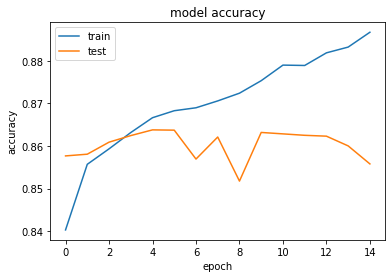

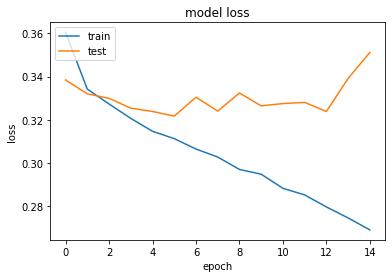

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

with 100 dimensional embeddings we achieved only 86% accuracy, we can increase window size and dimension of vectors.